In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")

In [93]:
data = pd.read_csv('NVDA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-08,301.489990,311.000000,299.070007,308.040009,308.002289,50310100
1,2021-11-09,322.820007,323.100006,299.640015,306.570007,306.532471,64674600
2,2021-11-10,293.559998,308.500000,287.779999,294.589996,294.553925,63620600
3,2021-11-11,304.679993,305.899994,297.769989,303.899994,303.862793,33217200
4,2021-11-12,300.100006,306.799988,296.299988,303.899994,303.862793,41215100


In [94]:
df = data[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")


<AxesSubplot:xlabel='Date'>

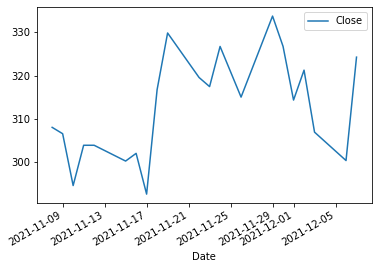

In [95]:
df.plot(style="-")

In [96]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

In [97]:
warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
  #for param in pdq:
      try:
          mod = sm.tsa.statespace.SARIMAX(df, order=param,       
enforce_stationarity=True, enforce_invertibility=True)
         
          results = mod.fit()
          # save results in lists
          aic.append(results.aic)
          parameters.append(param)
          #seasonal_param.append(param_seasonal)
          print('ARIMA{} - AIC:{}'.format(param, results.aic))
      except:
          continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)           

print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))

ARIMA(0, 0, 0) - AIC:302.91364961295966
ARIMA(0, 0, 1) - AIC:280.1030843864434
ARIMA(0, 0, 2) - AIC:264.36575972456234
ARIMA(0, 1, 0) - AIC:157.92075007353603
ARIMA(0, 1, 1) - AIC:156.25774833251808
ARIMA(0, 1, 2) - AIC:157.58733701790698
ARIMA(0, 2, 0) - AIC:167.3102945479427
ARIMA(0, 2, 1) - AIC:156.00528886441455
ARIMA(0, 2, 2) - AIC:155.6994723217495
ARIMA(1, 0, 0) - AIC:174.2644747210769
ARIMA(1, 0, 1) - AIC:172.57211993290315
ARIMA(1, 0, 2) - AIC:173.9096917321997
ARIMA(1, 1, 0) - AIC:158.0589501276817
ARIMA(1, 1, 1) - AIC:158.00874026850693
ARIMA(1, 1, 2) - AIC:158.67042674006188
ARIMA(1, 2, 0) - AIC:164.36488006862533
ARIMA(1, 2, 1) - AIC:156.7545467781641
ARIMA(1, 2, 2) - AIC:159.74810043636438
ARIMA(2, 0, 0) - AIC:174.38650606309915
ARIMA(2, 0, 1) - AIC:178.08068535482022
ARIMA(2, 0, 2) - AIC:175.9586939477732
ARIMA(2, 1, 0) - AIC:156.9115182792724
ARIMA(2, 1, 1) - AIC:157.47376417550856
ARIMA(2, 1, 2) - AIC:153.9787065725804
ARIMA(2, 2, 0) - AIC:157.06052895457955
ARIMA(2, 2

In [98]:
model = ARIMA(df, order=parameters[index_min])
model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -71.930
Method:                       css-mle   S.D. of innovations              7.670
Date:                Wed, 08 Dec 2021   AIC                            155.861
Time:                        13:31:11   BIC                            161.835
Sample:                             1   HQIC                           157.027
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6396      1.814      0.353      0.724      -2.915       4.195
ar.L1.D.Close    -1.2285      0.054    -22.552      0.000      -1.335      -1.122
ar.L2.D.Close    -0.9869      0.025    -

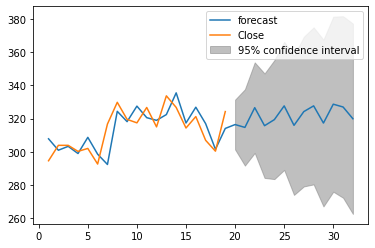

In [99]:
model_fit.plot_predict(start=2, end=len(df)+12)
plt.show()